<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-основных-параметров-данных-квартир" data-toc-modified-id="Изучение-основных-параметров-данных-квартир-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение основных параметров данных квартир</a></span></li><li><span><a href="#Анализ-данных-по-параметру-времени-продажи-квартир" data-toc-modified-id="Анализ-данных-по-параметру-времени-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ данных по параметру времени продажи квартир</a></span></li><li><span><a href="#Редкие-и-выбивающиеся-значения" data-toc-modified-id="Редкие-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Редкие и выбивающиеся значения</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы влияющие на стоимость квартиры</a></span></li><li><span><a href="#Анализ-параметров-квартир-в-крупных-локациях" data-toc-modified-id="Анализ-параметров-квартир-в-крупных-локациях-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ параметров квартир в крупных локациях</a></span></li><li><span><a href="#Изучение-параметра-стоимости-и-удаленности-от-центра" data-toc-modified-id="Изучение-параметра-стоимости-и-удаленности-от-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение параметра стоимости и удаленности от центра</a></span></li><li><span><a href="#Анализ-параметров-квартир-в-центре" data-toc-modified-id="Анализ-параметров-квартир-в-центре-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ параметров квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

**Цель исследования** - определить основные параметры, которые влияют на рыночную стоимость объектов недвижимости.

**Исходные данные** - данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Основные вопросы исследования данных:**

- Изучение среднего срока продажи квартиры.
- Изучение факторов, влияющих на стоимость квартиры. 
- Определение средней стоимости квадратного метра в выборке населенных пунктов с наибольшим количеством объявлений.
- Анализ влияния удаленности от центра Санкт-Петербурга на стоимость квартиры. 
- Анализ конкретных параметров, влияющих на стоимость квартир в сегменте центра и сравнение его с общими данным по всей базе.

## Изучение данных из файла

In [1]:
#Откроем файл, изучим типы данных, пропущенные и некорректные значения, посмотрим число дубликатов

import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head(10))
data.info()
print('Число дубликатов:', data.duplicated().sum())

data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Итак, по полученным данным можно сделать слудующие выводы:
- В столбцах встречаются пропущенные значения.
- Присутствуют некорректные типы дынных.
- В данные есть аномальные значения.

## Предобработка данных

Для начала приведем данные в некоторых столбцах к нужным типам, и, для корректности работы, сделаем это одновременно с заменой пропущенных значений.
Во-первых, заменяем на целые числа данные в столбцах - `last_price`, `balcony`, `parks_around3000`, `ponds_around3000`(Вещественный тип данных совершенно не уместен в значениях счета: числа балконов, парков, водоемов; значения же цены квартиры приведем к типу int для удобства).
Во-вторых, дату `first_day_exposition` приведем к соотвествующему типу.
Все пропуски в данных `balcony`, `parks_around3000`, `ponds_around3000`безболезненно заменяем на 0. Т.к. это логично, действительно, данные не заполнены в связи с отсутствием конкретного объекта (балкона, пруда, парка).
В столбце `is_apartment` мало значений. Возможно, параметр для заполнения введен недавно. Можно заменить недостающие значения на False.

In [2]:
# Перевод стоимости квартиры в целочисленный тип
data['last_price'] = data['last_price'].astype(int)

In [3]:
# Перевод числа балконов квартиры в целочисленный тип, замена пропусков
data['balcony'] = data['balcony'].fillna(value=0).astype('int')

In [4]:
# Перевод числа парков в радиусе 3 км. от квартиры в целочисленный тип, замена пропусков
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int')

In [5]:
# Перевод числа прудов в радиусе 3 км. от квартиры в целочисленный тип, замена пропусков
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int')

In [6]:
# Замена пропущенных значений в данных булева типа апартаментов на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Необходимо привести дату публикации объявления к верному формату

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
# Количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

К сожалению, одним из основных параметров формирования стоимости квартиры, является ее локация. Пропущенных значений локации в данных, в целом, не так много. Удалим эти записи.

In [9]:
# Удаление строк, где отсутствует название населенного пункта
data.dropna(subset=['locality_name'], inplace=True)

Итак, высоту потолков `ceiling_height` можно заполнить медианным значением.

In [10]:
# Замена оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Пропущенные данные по площадям кухни и жилой `living_area` и `kitchen_area` заполним пропорционально.

In [11]:
living_proportion = data['living_area'].mean() / data['total_area'].mean()
kitchen_proportion = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_proportion * data['total_area'])
data['kitchen_area'].fillna(kitchen_proportion * data['total_area'])

0        25.000000
1        11.000000
2         8.300000
3        27.848234
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696     9.930785
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23650, dtype: float64

Исправим пропуски в общем количестве этажей. Т.к. общая доля пропусков не такая большая, записи можно удалить.

In [12]:
# Удаление строк, где отсутствует параметр кол-ва этажей в доме
data.dropna(subset=['floors_total'], inplace=True)

Восстановить данные о длительности размещения нет возможности, поэтому их также удалим.

In [13]:
# Удаление строк, где отсутствует параметр кол-ва дней размещения объявления
data.dropna(subset=['days_exposition'], inplace=True)

Пропуски по данным о расстояниях (от центра, парка, водоема трогать не будем). Слишком незначительный параметр для удаления, плюс нет возможности заменить какими-либо логичными данными.

## Расчёты и добавление результатов в таблицу

Для анализа необходимо добавить столбец с ценой квадратного метра квартиры `specific_in`

In [14]:
# Добавление столбеца со стоимостью квадратного метра. Перевод числа в целочисленный тип
data['specific_in'] = data['last_price'] / data['total_area']
data['specific_in'] = data['specific_in'].astype(int)

Также необходимо добавить столбцы день недели, месяц и год публикации объявления - `weekday`, `month`, `year`.

In [15]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Для общих выводов по параметрам необходимо сгруппировать данные по этажам и добавить стоблец `floor_type` с вариантами первый, последний, другой.

In [16]:
# Создание функции для заполнения нового столбца с параметром этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

По имеющимся данным площадей добавим столбцы соотношения жилой и общей площади квартиры `living_proportion`  и отношение площади кухни к общей площади `kitchen_proportion`

In [17]:
# Добавление столбца с отношением жилой площади к общей. Перевод в %. Перевод числа в целочисленный тип.
data['living_proportion'] = data['living_area'] / data['total_area'] * 100
data['living_proportion'] = data['living_proportion'].fillna(value=0).astype(int)

In [18]:
# Добавление столбца с отношением площади кухни к общей. Перевод в %. Перевод числа в целочисленный тип.
data['kitchen_proportion'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_proportion'] = data['kitchen_proportion'].fillna(value=0).astype(int)

Проверим таблицу после приведения приведения данных в порядок и добавления новых столбцов.

In [19]:
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,specific_in,weekday,month,year,floor_type,living_proportion,kitchen_proportion
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0,NaN,81.0,82920,1,12,2018,первый,46,27
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,61,14
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,0,0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,32,41
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,NaN,55.0,95065,0,9,2018,другой,47,29
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0,NaN,155.0,99195,3,11,2017,другой,28,38
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,NaN,189.0,87454,2,5,2018,другой,46,26
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,NaN,289.0,88524,6,2,2017,другой,71,10
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,2,553.0,137.0,127525,3,11,2017,другой,51,21
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,0,NaN,7.0,75000,0,8,2018,другой,70,13


## Исследовательский анализ данных

### Изучение основных параметров данных квартир

Изучим основные параметры квартир: площади, цены, числа комнат, высоту потолков. Построим гистограммы для каждого параметра.

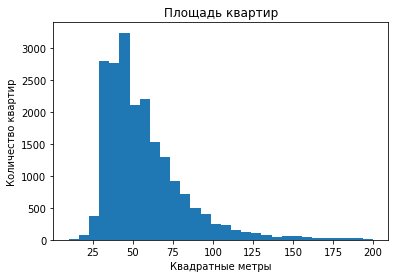

count    20394.000000
mean        58.834265
std         34.066200
min         12.000000
25%         39.500000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64

In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['total_area'].describe()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Вы еще не проходили подписи осей, молодец, что разобралась!

Первоначально можно сказать, что основное количество квартир менее 75 кв.м. Большинство варьируется в пределах 50 кв.м. 

In [21]:
data['last_price'] = data['last_price'].astype('int')
data['last_price'].describe()

count    2.039400e+04
mean     6.263722e+06
std      1.088858e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

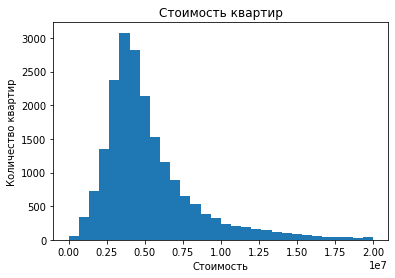

In [22]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

Большинство представленных квартир имеют стоимость от 4 до 6 миллионов рублей. В данных встречаются варианты низкой ценой и со слишком высокой. Но их кол-во незначительно.

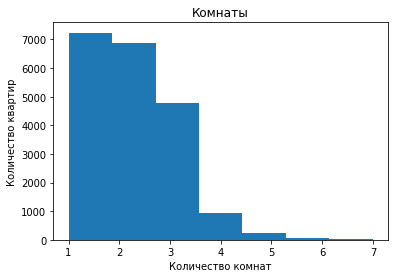

count    20394.000000
mean         2.024370
std          1.055162
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [23]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].describe()

Основная масса квартир на рынке представлена 1-2 к.квартирами. Количество комнат в сторону увеличения значительно ниже.

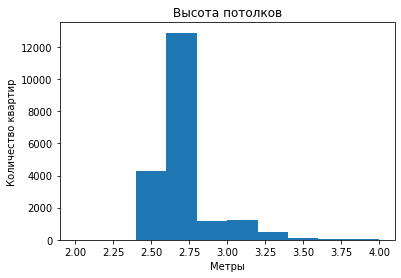

count    20394.000000
mean         2.715801
std          0.972956
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [24]:
plt.hist(data['ceiling_height'], bins=10, range=(2,4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['ceiling_height'].describe()

Большинство квартир имеют потолки от 2,55 м. до 2,76 м. На рынке также есть и варианты квартир с высотой потолков более 3 метров.

В целом, все данные по параметрам площади, цены, количеству квартир и высоте потолков, ожидаемо, имеют нормальные значения. Редкие, выбивающиеся значения и зависимости рассмотрим далее.

### Анализ данных по параметру времени продажи квартир

Изучим время продажи квартиры и построим гистограмму. Найдем среднее и медиану. 

In [25]:
# Вывод на экран среднего значения и медианы срока продажи квартир
print('Время продажи (медиана):', data['days_exposition'].median())
print('Время продажи (среднее):', data['days_exposition'].mean())

Время продажи (медиана): 95.0
Время продажи (среднее): 180.7413945278023


Посмотрим основные параметры по данным срока продаж.

In [26]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Для выводов построим диаграмму размаха и гистограммы с разными пределами.

45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
969.0       1
1147.0      1
1.0         1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64

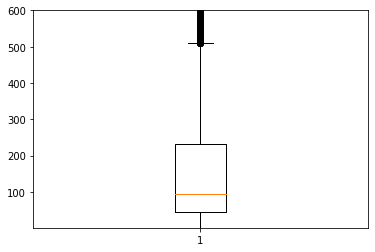

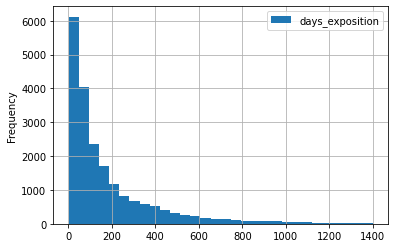

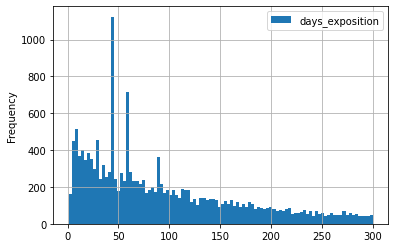

In [47]:
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,600)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1400))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))

# Посмотрим наибольшее кол-во уникальных значений 
data['days_exposition'].value_counts()

По межквартильным размахам можно сказать, что если квартира была продана меньше, чем за 45 дней, продажа прошла быстро. Больше 231 дня - продажа была долгой. По данным гистограммы встречаются выбивающиеся значения. 30 и 45 дней однозначно связаны со сроком размещения объявлений на площадке Яндекс Недвижимости.

### Редкие и выбивающиеся значения

Основное, по данным выше в `days_exposition` проверим среднее и медиану без учета стандартных данных по времени размещения.

count    19414.000000
mean       187.796539
std        222.842450
min          1.000000
25%         45.000000
50%        104.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

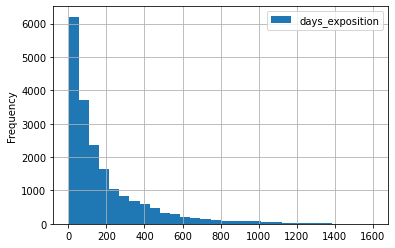

In [28]:
timeframe = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

#гистограмма
timeframe.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

#основные параметры
timeframe['days_exposition'].describe()             

Данные по срокам немного изменились. Основное время продажи, при средней оценке, во временных рамках выгрузки варьируется в пределах от 1,5 мес. до 3,4 мес. 

Уберем другие значения в параметрах по квартирам с учетом 1.5 размаха.

In [29]:
# Функция границ с учетом 1.5 размаха
def quartile(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile(data, col)

# Выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,specific_in,weekday,month,year,living_proportion,kitchen_proportion
count,20394.000000,1.872200e+04,19374.000000,20257.000000,18080.000000,20394.000000,18117.000000,20394.000000,17432.000000,20394.000000,...,6887.000000,20394.000000,7822.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000
mean,9.631362,4.714305e+06,53.307962,1.990670,2.632262,10.863293,30.872814,5.973767,9.471403,0.594440,...,490.827065,0.587084,520.541294,180.741395,9.801248e+04,2.583750,6.586839,2017.219231,51.245415,16.617338
std,5.658712,2.074946e+06,18.608710,0.961626,0.079546,6.649703,13.576346,4.931607,3.083453,0.950411,...,344.650064,0.879206,277.416834,219.732782,4.781170e+04,1.782536,3.488032,0.965364,18.330290,8.832876
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,...,287.000000,0.000000,299.000000,45.000000,7.647000e+04,1.000000,3.000000,2017.000000,46.000000,12.000000
50%,9.000000,4.300000e+06,49.100000,2.000000,2.650000,9.000000,29.400000,4.000000,9.000000,0.000000,...,451.000000,0.000000,505.000000,95.000000,9.407600e+04,3.000000,7.000000,2017.000000,55.000000,16.000000
75%,14.000000,5.800000e+06,64.000000,3.000000,2.650000,16.000000,40.000000,8.000000,11.000000,1.000000,...,613.000000,1.000000,732.000000,231.000000,1.121210e+05,4.000000,10.000000,2018.000000,62.000000,22.000000
max,50.000000,1.110000e+07,110.200000,5.000000,2.850000,60.000000,76.300000,33.000000,19.210000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,100.000000,78.000000


Стандартно, убрали значения на основе 1.5 размаха, чтобы не мешали выборке.

### Факторы влияющие на стоимость квартиры

Проверим зависимость цены от общей площади квартиры.

0.6905078474392615

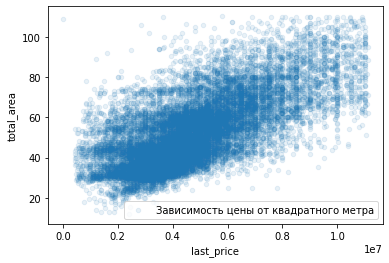

In [30]:
# График и коэффициент корреляции
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, label='Зависимость цены от квадратного метра')
data['total_area'].corr(data['last_price'])

Зависимость есть. В основном сегменте цена зависит от площади квартиры. Чем больше площадь, тем выше стоимость.

Проверим зависимость цены от числа комнат в квартире.

0.4543141217138158

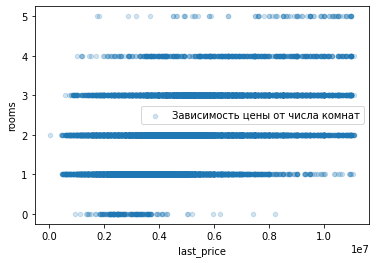

In [31]:
# График и коэффициент корреляции
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.2, label='Зависимость цены от числа комнат')
data['rooms'].corr(data['last_price'])

Зависимость есть, но не такая большая. Больше комнат - выше стоимость. 

Проверим зависимость цены от удалённости от центра.

-0.34406241845512997

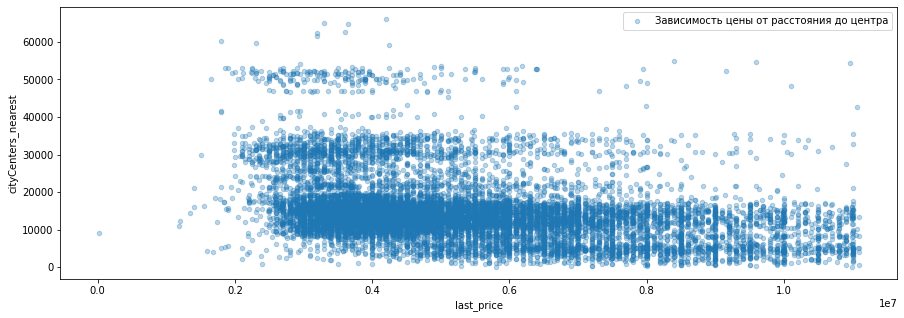

In [32]:
# График и коэффициент корреляции
data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3, figsize=(15,5), label='Зависимость цены от расстояния до центра')
data['cityCenters_nearest'].corr(data['last_price'])

И посмотрим удельный показатель цены и площади:

-0.31704902991521394

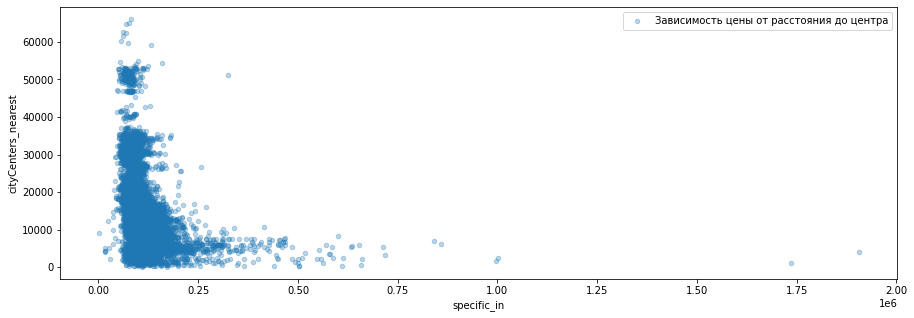

In [44]:
data.plot(x='specific_in', y='cityCenters_nearest', kind='scatter', alpha=0.3, figsize=(15,5), label='Зависимость цены от расстояния до центра')
data['cityCenters_nearest'].corr(data['specific_in'])

Аналогично, отрицательный коэффициент корреляции. Ближе к центру - выше стоимость. Дальше от центра - цена ниже.

floor_type
другой       4891192.0
первый       4022010.0
последний    4403902.0
Name: last_price, dtype: float64

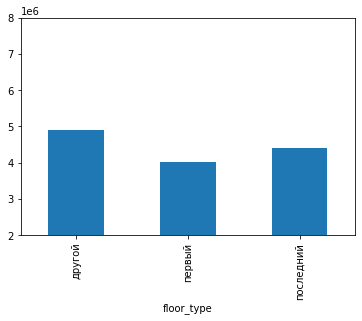

In [33]:
# График
data.groupby('floor_type')['last_price'].agg('mean').plot(kind='bar')
plt.ylim(2000000, 8000000)
data.groupby('floor_type')['last_price'].agg('mean').round()

На первом этаже цена квартиры ниже. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Итак, посмотрим общие данные по этим параметрам. Постром матрицу рассеяния для подтверждения общих выводов зависимостей параметров.

                     total_area     rooms  cityCenters_nearest  last_price
total_area             1.000000  0.792962            -0.176603    0.690508
rooms                  0.792962  1.000000            -0.160229    0.454314
cityCenters_nearest   -0.176603 -0.160229             1.000000   -0.344062
last_price             0.690508  0.454314            -0.344062    1.000000


array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>],
       [<AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>],
       [<AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
     

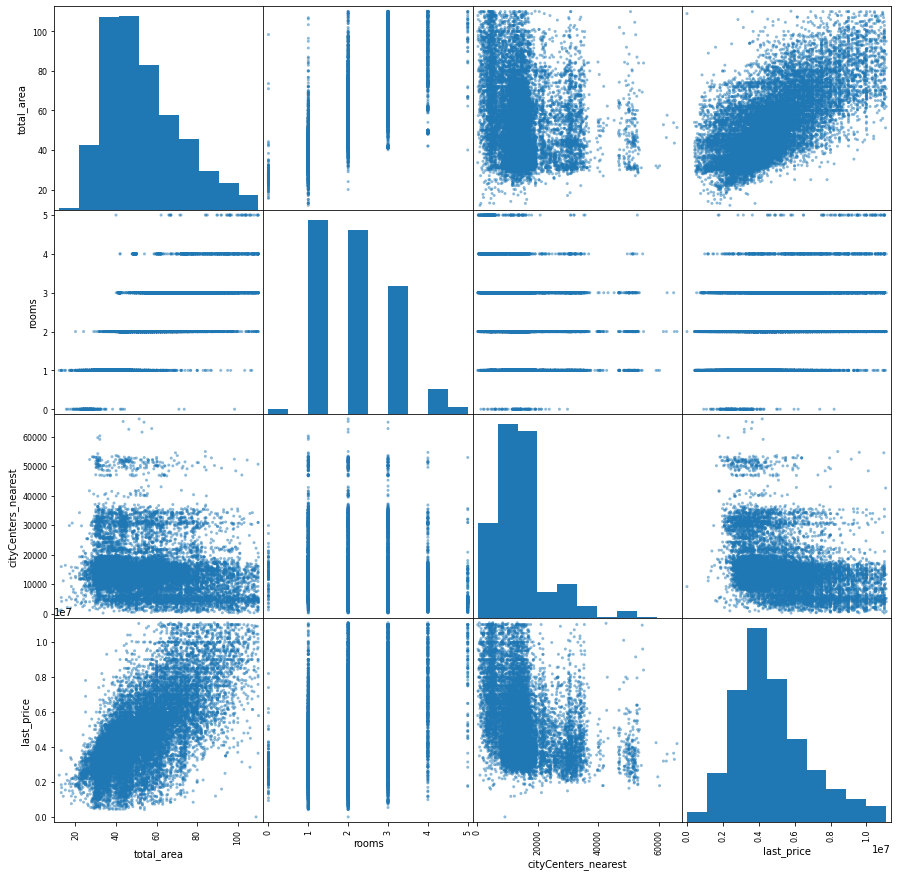

In [34]:
print(data[['total_area','rooms','cityCenters_nearest','last_price', 'floor_type']].corr())
pd.plotting.scatter_matrix(data[['total_area','rooms','cityCenters_nearest','last_price', 'floor_type']],figsize=(15,15))

Да, в целом, больше площадь, выше стоимость. Больше комнат - больше цена (зависимость выше, чем у общей площади квартиры). Ближе к центру - меньше комнат, дороже стоимость.

Посмотрим зависимость от даты размещения объявлений квартир: дня недели, месяца и года. 

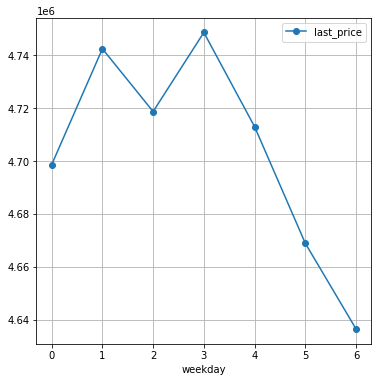

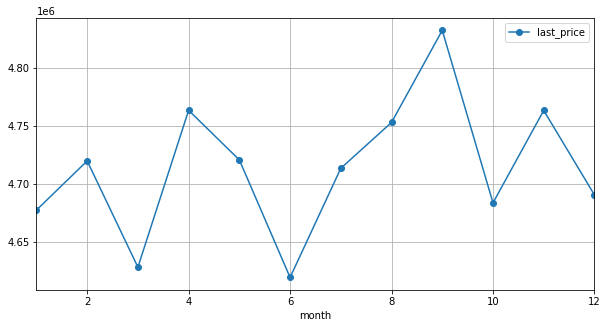

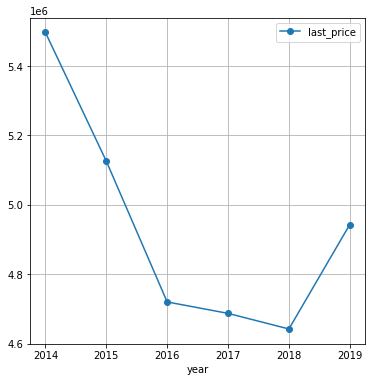

In [35]:
# Зависимость от дня размещения
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()

# Зависимость от месяца размещения
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))

plt.show()

# Зависимость от года размещения
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()

Интересные результаты, но они не могут влять на стоимость. Итак, дороже квартиры, опубликованные во вторник, дешевле - в субботу. Если делать выводы по месяцу, то дороже квартиры - апрель и ноябрь, дешевле - июнь. Год: самая низкая стоимость с 2016 по 2018 (падение рынка), вновь повышение в 2019, наибольшая - 2014. 


### Анализ параметров квартир в крупных локациях

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [36]:
# Средняя стоимость квадратного метра в топ-10 городов по числу объявлений, сортировка

city_max = data['locality_name'].value_counts().head(10)
city_specific_in = data.query('locality_name in (@city_max.index)').pivot_table(values='specific_in', index='locality_name')
city_specific_in = city_specific_in.astype(int)
city_specific_in.sort_values('specific_in', ascending=False)

,specific_in
locality_name,
Санкт-Петербург,112438
Пушкин,102074
деревня Кудрово,92473
посёлок Парголово,89504
посёлок Мурино,85738
посёлок Шушары,77872
Колпино,74864
Всеволожск,68570
Гатчина,67927


Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем престижная локация Пушкин. Следом спальные районы новой жилой застройки. Из Топ-10 наименьшая стоимость в Гатчине и Выборге (связано однозначно с удаленностью от центра).

### Изучение параметра стоимости и удаленности от центра

Создадим столбец `center_distance` с расстоянием до центра в километрах и выделим для анализа Санкт-Петербург.

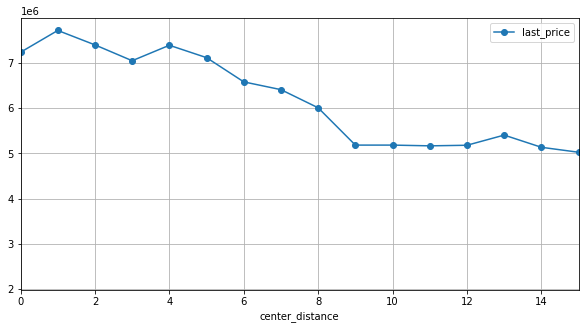

In [46]:
# Данные с расстоянием до центра в км
data['center_distance'] = data['cityCenters_nearest'] / 1000
data['center_distance'] = data['center_distance'].fillna(value=0).astype(int)

#График общей цены по локации Санкт-Петербурга
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_distance', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.show()


Посмотрим удельные показатели:

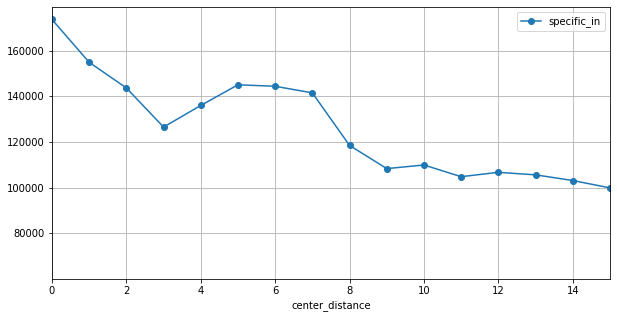

In [45]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_distance', values='specific_in').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.show()

In [38]:
# Вывод таблицы со средним расстоянием до центра в км. и удельным
pivot_table_km = round(data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'center_distance', values = 'specific_in', aggfunc = 'mean'))
print(pivot_table_km)

                 specific_in
center_distance             
0                   173672.0
1                   154911.0
2                   143680.0
3                   126541.0
4                   136004.0
5                   145052.0
6                   144408.0
7                   141506.0
8                   118505.0
9                   108356.0
10                  109928.0
11                  104809.0
12                  106722.0
13                  105613.0
14                  103136.0
15                   99908.0
16                   98932.0
17                   93690.0
18                   93670.0
19                   96572.0
20                  103685.0
21                   90588.0
22                   86622.0
23                   91463.0
24                   82440.0
25                   90500.0
26                   75171.0
27                  132115.0
28                   81840.0
29                   65460.0


В целом, корректные данные. По таблице и графику видно, что цена зависит от удалённости от центра. Граница, где график сильно меняется — 7 км. Область до 7 км. - это и будет центральная зона. Дальше от центра - стоимость ниже.

### Анализ параметров квартир в центре

Поанализируем сегмент квартир в центре. Изучим параметры площади, цены, числа комнат, высоту потолков.

In [39]:
# Определим переменную для работы с сегментом квартир в локации центра Санкт-Петербурга 
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_distance <= 7)')

# Посмотрим общие данные по параметрам квартир в локации центра Санкт-Петербурга
spb_center.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,specific_in,weekday,month,year,living_proportion,kitchen_proportion,center_distance
count,3124.00,2065.00,2455.00,3006.00,1787.00,3124.00,2425.00,3124.00,2334.00,3124.00,...,3124.00,2221.00,3124.00,3124.00,3124.00,3124.00,3124.00,3124.00,3124.00,3124.00
mean,9.96,7070515.34,67.09,2.58,2.66,7.37,40.23,4.33,11.10,0.35,...,1.27,467.59,244.52,141216.70,2.55,6.63,2017.00,52.65,15.50,4.19
std,5.98,2027174.01,21.75,1.12,0.07,4.09,16.52,3.14,3.48,0.78,...,1.09,269.87,271.08,88453.79,1.72,3.44,1.04,19.27,9.46,1.79
min,0.00,1600000.00,12.00,0.00,2.46,2.00,2.00,1.00,2.00,0.00,...,0.00,22.00,3.00,15345.00,0.00,1.00,2014.00,0.00,0.00,0.00
25%,5.00,5550000.00,49.00,2.00,2.65,5.00,27.50,2.00,8.33,0.00,...,0.00,230.00,60.00,99226.75,1.00,3.00,2016.00,47.00,10.00,3.00
50%,9.00,6980000.00,66.20,3.00,2.65,6.00,39.00,4.00,10.60,0.00,...,1.00,458.00,139.00,121135.00,3.00,7.00,2017.00,57.00,14.00,4.00
75%,14.00,8550000.00,84.20,3.00,2.65,9.00,53.00,5.00,13.70,0.00,...,2.00,670.00,342.00,151992.50,4.00,10.00,2018.00,65.00,20.00,5.00
max,50.00,11100000.00,110.20,5.00,2.85,27.00,76.30,25.00,19.20,5.00,...,3.00,1293.00,1572.00,1907500.00,6.00,12.00,2019.00,98.00,63.00,7.00


Итак, сравним основные параметры площади квартир (общая и локально):

Площадь (медиана): 51
Площадь в центре (медиана): 66
Площадь (среднее): 55
Площадь в центре (среднее): 67


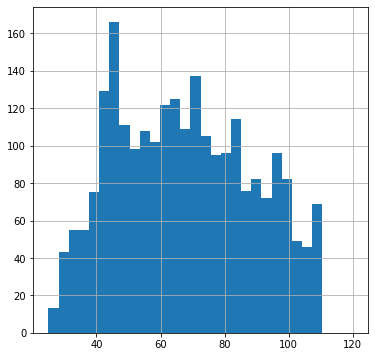

In [42]:
# Определим медиану и среднее
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()))
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()))
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()))
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()))
spb_center['total_area'].hist(bins=30, range=(25,120), figsize=(6,6))
plt.show()

Площадь квартир в центре больше, чем в целом по городу.

Данные по ценам:

Цена (медиана): 4999000
Цена в центре (медиана): 6980000
Цена (среднее): 5471976
Цена в центре (среднее): 7070515


<AxesSubplot:>

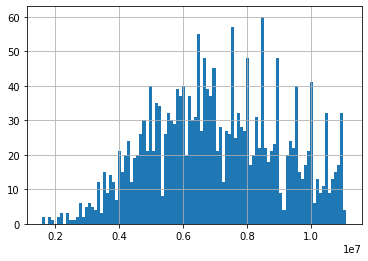

In [43]:
print('Цена (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['last_price'].median()))
print('Цена в центре (медиана):', round(spb_center['last_price'].median()))
print('Цена (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['last_price'].mean()))
print('Цена в центре (среднее):', round(spb_center['last_price'].mean()))

spb_center['last_price'].hist(bins=100)

Теперь в общем сравнении да, выводы подтверждаются. Цена выше, в среднем 6,4 млн.

Изучим данные по количеству комнат (Санкт-Петербург и его центр):

In [42]:
# Определим сумму и долю по городу
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100

# И по его центру
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_distance <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100

# Составим таблицу
rooms_all = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_all['center'] = round(rooms_all['center_count'] / rooms_all['count'] * 100)
display(rooms_all)

,count,rooms_ratio,center_count,center_rooms_ratio,center
rooms,,,,,
1.0,4470,33.490672,508,16.995651,11.0
2.0,4438,33.250918,957,32.017397,22.0
3.0,3436,25.743613,940,31.448645,27.0
4.0,773,5.791564,402,13.449314,52.0
5.0,230,1.723234,182,6.088993,79.0


Большинство квартир как в целом до данным и по городу, так и по центру Санкт-Петербурга - это 2-3 к.кв. В локации центра - низкая доля однокомнатных квартир и высокая четырехкомнатных. Историческая застройка города, коммунальные квартиры показывают однозначный результат по наибольшей доле 5-ти к. квартир в центральной его части.

Посмотрим и сравним общие данные по высоте потолков в реализуемых квартирах.

In [47]:
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median())
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median())
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean())
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean())

Высота потолков (медиана): 2.65
Высота потолков в центре (медиана): 2.65
Высота потолков (среднее): 2.6358254187532375
Высота потолков в центре (среднее): 2.66194180190263


Ожидалась более явная разница в высоте потолков, в связи с застройкой и типами квартир в центре города. В данном случае она незначительна, но в центре высота полков квартир в центре больше, чем в остальных, отдаленных районах города.

Далее проанализируем влияние других параметров квартир в центральной части, которые также способны оказать влияние на их стоимость.

Изучим данные по количеству комнат.

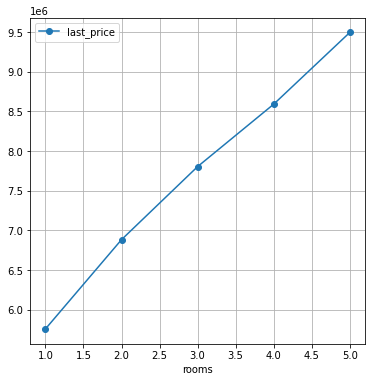

Корреляция цены и числа комнат:
            last_price     rooms
last_price    1.000000  0.438884
rooms         0.438884  1.000000 



In [50]:
# Составим таблицу с корреляцией и выведем график

spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()
print('Корреляция цены и количества комнат:')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr())

Да, изучив и по верхний график и этот можно отметить, что зависимость стоимости квартиры от числа комнат в центре такая же, как и в целом по остальным районам города.

Изучим данные по размещению квартиры на этаже.

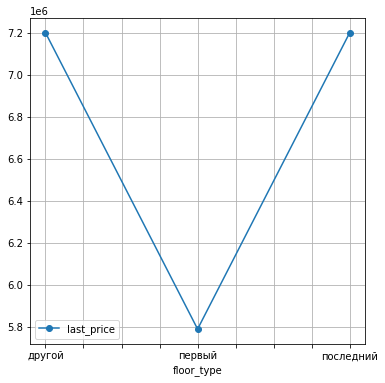

In [56]:
spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()

Аналогично, ситуация такая же, как и в целом по остальным районам города. Первые этажи дешевле.

Итак, время размещения и стоимость квартир. Построим такие же графики для центра, как и для всех остальных районов. Есть ли здесь явные отличия.

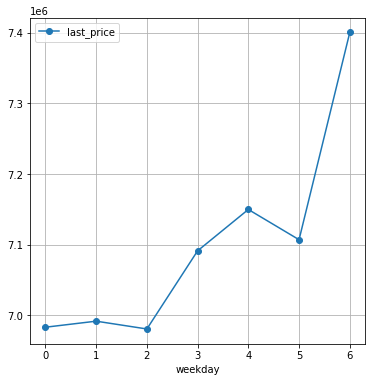

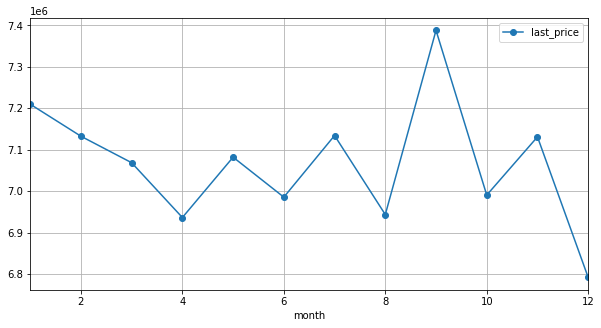

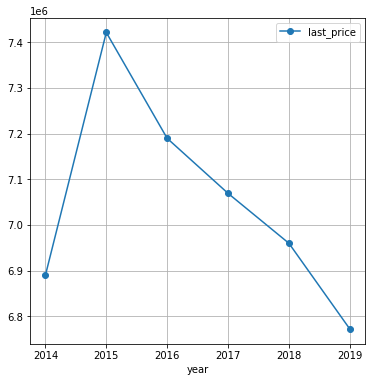

In [58]:
# Зависимость от дня размещения
spb_center.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()

# Зависимость от месяца размещения
spb_center.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()

# Зависимость от года размещения
spb_center.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(6, 6))
plt.show()

Не менее  интересные результаты. В данном случае, дороже квартиры, опубликованные в воскресенье, дешевле - в понедельник/среду. Если делать выводы по месяцу, то наиболее высокая стоимость квартир - сентябрь, самая низкая, как и предполагается рынком перед новым годом - декабрь. Год: в целом рынок должен быть одинаков в таком временном промежутке, но, как мы видим, в центре города наибольшая стоимость была в 2015, наименьшая в 2014 и 2019, что совершенно противоречит данным по остальным районам города..Однозначно, год важный показатель, над разницей нужно подумать. Возможно как раз таки и связано с активным расселение к.квартир и большого объема такого рынка.

## Общий вывод

В ходе изучения рыночной стоимости квартир и ее взаимосвязи с внешними и внутренними параметрами можно сделать следующие краткие выводы.

В целом, стоимость квартиры зависит от ее площади, кол-ва комнат, удалении от центра. На стоимость квартир (показательно, в удалении от центра) больше влияет площадь квартиры, а не количество комнат. Расположение квартир по этажам (центр/удаление от центра) как фактор незначительно влияет на их конечную стоимость (однако первые этажи, как правило, дешевле).
Основное количество квартир менее 75 кв.м. Большинство варьируется в пределах 50 кв.м. В центральных районах большая доля студий.

Большинство представленных квартир имеют стоимость от 4 до 6 миллионов рублей. В данных встречаются варианты низкой ценой и со слишком высокой. 

Средняя высота потолков от 2,55 м. до 2,76 м. На рынке также есть и варианты квартир с высотой потолков более 3 метров, преимущественно в центральных районах.

Самый высокий удельный показатель стоимости (кв.м) в Санкт-Петербурге – 112 438 р.
Самый низкий в Выборге – 57 084 р. (зависимость от расстояния от центра).

Срок продажи квартиры во временных рамках выгрузки данных составлял от 1,5 месяцев до 3,4 месяцев. Если квартира была продана меньше, чем за 45 дней, продажа прошла быстро. 

По центральным районам (до 7 км.):  ближе к центру - меньше комнат, выше удельный показатель. Площадь квартир в центре больше, чем в целом по городу. В локации центра - низкая доля однокомнатных квартир и высокая четырехкомнатных. По фактору влияния дня и месяца размещения на стоимость выводом однозначных сделать нельзя. Изучив год размещения, можно все-таки сказать, что спрос на квартиры в центре менее эластичен в зависимости от экономики.

Общая картина есть, для более конкретного и тщательного исследования самого рынка жилой недвижимости по ценам и параметрам интересно изучить актуальные данные сервиса.